<a href="https://colab.research.google.com/github/alam4466/cwiczenia1/blob/main/Uczenie_maszynowe3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

zaczytanie niezbędnych bibliotek

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler

zaczytaj dane dotyczace sprzedazy

In [ ]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Salary Data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rkiattisak/salaly-prediction-for-beginer",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-7-72cc2aa30810>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:     Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


preprocessing

1.   sprawdż typy danych
2.   zmien etykiedy na zmienne liczbowe
3. w przypadku brakujacych danych uzupelnij (w przypadku etykiet) najczesciej wystepującą wartością lub średnią wartością



In [ ]:
print(df.dtypes)

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
  if df[column].dtype == object:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

print(df.head())

    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        159                  5.0   90000.0
1  28.0       0                1         17                  3.0   65000.0
2  45.0       1                2        130                 15.0  150000.0
3  36.0       0                0        101                  7.0   60000.0
4  52.0       1                1         22                 20.0  200000.0


In [ ]:
for column in df.columns:
  if df[column].dtype == object:
    # Replace missing values with the most frequent value for categorical features
    most_frequent_value = df[column].mode()[0]
    df[column].fillna(most_frequent_value, inplace=True)
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
  else:
    # Replace missing values with the mean for numerical features
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

print(df.head())

    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        159                  5.0   90000.0
1  28.0       0                1         17                  3.0   65000.0
2  45.0       1                2        130                 15.0  150000.0
3  36.0       0                0        101                  7.0   60000.0
4  52.0       1                1         22                 20.0  200000.0


<ipython-input-14-9c49d9f79a70>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)


Podziel zbiór danych na testowy i treningowy w stosunku 30/70

In [ ]:
X = df.drop('Salary', axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Stworz model regresji liniowej korzystajac z parametrów domyślnych
Przykład dokumentacji: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X = X[:, [2]]  # Use only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)

ocen model na zbiorze testowym za pomocą miar: średni błąd kwadratowy, średni błąd absolutny, wynik wyjaśnionej wariancji

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 2548.07
Coefficient of determination: 0.47


spróbuj poprawić model, zacznij od danych, sprawdz korelacje, znormalizuj

Zbuduj model regresji odpornej i przetestuj jego predykcje

Wykreś przewidziane i faktyczne wartości obu modeli (przykład w dokumentacji: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py)

HuberRegressor Mean squared error: 2438.01
HuberRegressor Coefficient of determination: 0.50


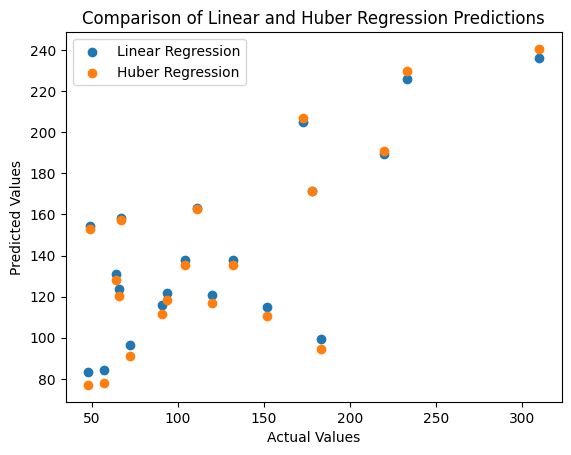

In [ ]:
# prompt: Zbuduj model regresji odpornej i przetestuj jego predykcje

import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor

# Zbuduj model regresji odpornej (HuberRegressor)
huber_regressor = HuberRegressor().fit(X_train, y_train)

# Przewidywanie na zbiorze testowym
y_pred_huber = huber_regressor.predict(X_test)

# Ocen model na zbiorze testowym za pomocą miar: średni błąd kwadratowy, średni błąd absolutny, wynik wyjaśnionej wariancji
print(f"HuberRegressor Mean squared error: {mean_squared_error(y_test, y_pred_huber):.2f}")
print(f"HuberRegressor Coefficient of determination: {r2_score(y_test, y_pred_huber):.2f}")

# Wykreślenie przewidzianych i faktycznych wartości obu modeli
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, y_pred_huber, label='Huber Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Comparison of Linear and Huber Regression Predictions')
plt.show()


Zmodyfikuj kod, zeby zwizualizować wynik lepszego z modeli

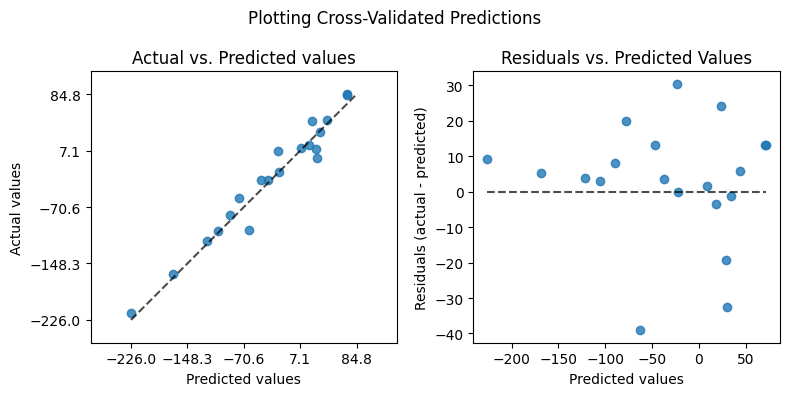

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic regression data
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)  # smaller test set

# Fit a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot prediction error display
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=20,  # set subsample to the size of y_test
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")

PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=20,  # set subsample to the size of y_test
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")

fig.suptitle("Plotting Cross-Validated Predictions")
plt.tight_layout()
plt.show()
